In [1]:
import numpy as np
import scipy.integrate as integrate
import math
import matplotlib.pyplot as plt

N  = 200
L  = 2.0 
dx = L/N

c = 2.0*(dx**2) # factor comes from Shrodinger equation 

N_1 = N-1

#  we will populate   elements corresponding to Psi_1 .... Psi_(N-1)
#  given that Psi_0 = Psi_N = 0.0
# i.e  i in [0,..N-2] as arrays start from 0 

A = np.zeros([N_1,N_1])

# forming the tridiagonal matrix
#  Psi_i  means Psi(x_i)
#
#  -Psi_0 + 2*Psi_1 - Psi_2            = E Psi_1
#         ....
#     0   - Psi_(N-2)+ 2*Psi_(N-1) -Psi_(N) = E Psi_(N-1)
# by taking Psi_0 and Psi_(N) out of the system (because of boundary condition)

for i in range(N_1):
    A[i,i]=2.0
    if (i<N_1-1):
        A[i,i+1] = A[i+1,i] =-1.0
        
eigenValues, eigenVectors = np.linalg.eig(A)

idx = eigenValues.argsort()

# Eigens states are column vectors of eigenVectors
EigenEnergy = eigenValues[idx]/c # c from the calculation
Psi         = eigenVectors[:,idx]

# adding the boundary conditions psi(0)=psi(N)=0
ziltch = np.zeros([1,N_1])
Psi = np.concatenate((ziltch,Psi), axis=0)
Psi = np.concatenate((Psi,ziltch), axis=0)


In [8]:
f = Psi[:,0]
g = f**2
S = integrate.simps(g,dx = dx)
Psi[:,0] = Psi[:,0]/math.sqrt(S)
g = Psi[:,0]**2
S = integrate.simps(g,dx = dx)
S

1.0

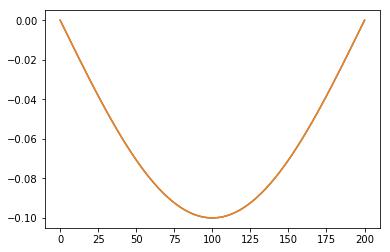

In [4]:
plt.plot(f)
plt.show()